<a href="https://www.kaggle.com/code/azminetoushikwasi/divorce-prediction-reasons-xgb-shap-rfe-tsne?scriptVersionId=109976311" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;color:white;margin:0;font-size:275%;text-align:center;display:fill;border-radius:5px;background-color:#26549e;overflow:hidden;font-weight:500">Predicting Divorce</div>



<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#26549e;overflow:hidden;font-weight:500">Divorce : How & Why? 📊 With PCA,SHAP,TSNE,RFE</div>

**EDA** is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset. EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

**XGBoost**, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Introduction</div>

# 1. Introduction
The objective of this notebook is to present an extensive analysis on the causes and predicting devorces.

Divorce (also known as dissolution of marriage) is the process of terminating a marriage or marital union. Divorce usually entails the canceling or reorganizing of the legal duties and responsibilities of marriage, thus dissolving the bonds of matrimony between a married couple under the rule of law of the particular country or state. Divorce laws vary considerably around the world,but in most countries, divorce requires the sanction of a court or other authority in a legal process, which may involve issues of distribution of property, child custody,alimony (spousal support), child visitation / access, parenting time, child support, and division of debt. In most countries, monogamy is required by law, so divorce allows each former partner to marry another person.

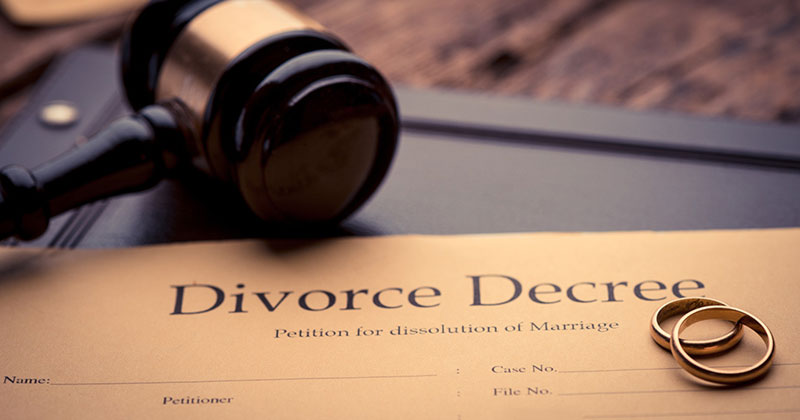

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Dataset Observations</div>

# 2. Dataset Observations

## 2.1. Primary Observation Insights
- Total 54 features as questions asked and a final answer - Divorced or not.
- All answers are in a scale of 0-4

## 2.2. Questions

Questions are ranked on a scale of 1-5 with 1 being the lowest and 5 being the highest. The last category states if the couple has divorced.

1.	If one of us apologizes when our discussion deteriorates, the discussion ends.
2.	I know we can ignore our differences, even if things get hard sometimes.
3.	When we need it, we can take our discussions with my spouse from the beginning and correct it.
4.	When I discuss with my spouse, to contact him will eventually work.
5.	The time I spent with my wife is special for us.
6.	We don't have time at home as partners.
7.	We are like two strangers who share the same environment at home rather than family.
8.	I enjoy our holidays with my wife.
9.	I enjoy traveling with my wife.
10.	Most of our goals are common to my spouse.
11.	I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12.	My spouse and I have similar values in terms of personal freedom.
13.	My spouse and I have similar sense of entertainment.
14.	Most of our goals for people (children, friends, etc.) are the same.
15.	Our dreams with my spouse are similar and harmonious.
16.	We're compatible with my spouse about what love should be.
17.	We share the same views about being happy in our life with my spouse
18.	My spouse and I have similar ideas about how marriage should be
19.	My spouse and I have similar ideas about how roles should be in marriage
20.	My spouse and I have similar values in trust.
21.	I know exactly what my wife likes.
22.	I know how my spouse wants to be taken care of when she/he sick.
23.	I know my spouse's favorite food.
24.	I can tell you what kind of stress my spouse is facing in her/his life.
25.	I have knowledge of my spouse's inner world.
26.	I know my spouse's basic anxieties.
27.	I know what my spouse's current sources of stress are.
28.	I know my spouse's hopes and wishes.
29.	I know my spouse very well.
30.	I know my spouse's friends and their social relationships.
31.	I feel aggressive when I argue with my spouse.
32.	When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33.	I can use negative statements about my spouse's personality during our discussions.
34.	I can use offensive expressions during our discussions.
35.	I can insult my spouse during our discussions.
36.	I can be humiliating when we discussions.
37.	My discussion with my spouse is not calm.
38.	I hate my spouse's way of open a subject.
39.	Our discussions often occur suddenly.
40.	We're just starting a discussion before I know what's going on.
41.	When I talk to my spouse about something, my calm suddenly breaks.
42.	When I argue with my spouse, ı only go out and I don't say a word.
43.	I mostly stay silent to calm the environment a little bit.
44.	Sometimes I think it's good for me to leave home for a while.
45.	I'd rather stay silent than discuss with my spouse.
46.	Even if I'm right in the discussion, I stay silent to hurt my spouse.
47.	When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48.	I feel right in our discussions.
49.	I have nothing to do with what I've been accused of.
50.	I'm not actually the one who's guilty about what I'm accused of.
51.	I'm not the one who's wrong about problems at home.
52.	I wouldn't hesitate to tell my spouse about her/his inadequacy.
53.	When I discuss, I remind my spouse of her/his inadequacy.
54.	I'm not afraid to tell my spouse about her/his incompetence.
55. 	Divorce Y/N

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Data, Libraries & Configurations</div>

# 3. Data, Libraries & Configurations

## 3.1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

from sklearn import manifold
from sklearn.metrics import accuracy_score

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

## 3.2. Configurations

In [2]:
warnings.filterwarnings('ignore')

## 3.3. Data Loading

In [3]:
df=pd.read_csv("/kaggle/input/predicting-divorce/divorce.csv")

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Descriptive Analysis</div>

# 4. Descriptive Analysis

In [4]:
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


### Insights: 
- All Columns are categorical on this Data
- Total 25 type of products is developed here in the EPZs
- Total 34 Country Invested here.

### 4.2 Analyze DF

In [5]:
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


### Primary Insights:  

- Values are counted highest in the marginal ones.
- Distribution of values seems quite normal

## 4.2 Descrptive Analysis

*credits: balabaskar/divorce-prediction-with-factor-analysis*

In [6]:
with open('../input/predicting-divorce/Divorce_README.txt') as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]

que = [x.split('\t')[1] for x in lines[2:]]
que[:5]

# Descriptive statistics
values = dict()
que_cols = df.drop('Divorce_Y_N',axis=1).columns
for c in que_cols:
    values[c] = dict(round(df[c].value_counts(normalize=True)*100,2))
    
que_rate_df = pd.DataFrame(values).rename(columns=dict(zip(que_cols,que))).T
que_rate_df = que_rate_df[range(5)]

print(" -> Yellow highlighted cells indicates the max percentage of people given that rating")
print(" -> Green highlighted cells indicates the min percentage of people given that rating")
# Highlighting the max & min value
que_rate_df.style\
      .format('{:.1f}%')\
      .highlight_max(color = 'bisque',axis=1)\
      .highlight_min(color = 'lightgreen',axis=1)


 -> Yellow highlighted cells indicates the max percentage of people given that rating
 -> Green highlighted cells indicates the min percentage of people given that rating


,0,1,2,3,4
"If one of us apologizes when our discussion deteriorates, the discussion ends.",40.6%,5.3%,8.2%,27.6%,18.2%
"I know we can ignore our differences, even if things get hard sometimes.",34.7%,13.5%,16.5%,22.4%,12.9%
"When we need it, we can take our discussions with my spouse from the beginning and correct it.",30.0%,14.1%,15.3%,30.6%,10.0%
"When I discuss with my spouse, to contact him will eventually work.",44.1%,7.1%,17.6%,18.8%,12.3%
The time I spent with my wife is special for us.,48.2%,5.9%,4.7%,25.9%,15.3%
We don't have time at home as partners.,50.6%,28.8%,17.1%,2.4%,1.2%
We are like two strangers who share the same environment at home rather than family.,67.1%,24.7%,2.9%,2.4%,2.9%
I enjoy our holidays with my wife.,47.6%,5.9%,12.3%,21.8%,12.3%
I enjoy traveling with my wife.,49.4%,4.1%,7.7%,28.8%,10.0%
Most of our goals are common to my spouse.,36.5%,10.6%,22.4%,20.0%,10.6%


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Data Wrangling</div>

# 5. Data Wrangling

### 5.1.1. Missing Values in df: 

In [7]:
df.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

- no missing values

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Statistical Analysis</div>

# 6. Statistical Analysis

## 6.1. Statistical Normality Tests
Normality tests are used to determine if a dataset is normally distributed and to check how likely it is for a random variable in the dataset to be normally distributed.

Popular normality tests - D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .

There are five numerical features in this dataset - **Land, SFB, TotalInvestment, ExportEarned, NewJobOpportunity** 

### 6.1.1. D’Agostino’s K^2 Test

In [8]:
col_names=list(df.columns)

In [9]:
def normaltest(col_name,df):
    stat, p = stats.normaltest(df[col_name])
    alpha = 0.05
    if p > alpha:
        print(col_name,'---------Sample looks Gaussian')
    else:
        print(col_name,'---------Sample does not look Gaussian')
    return (stat, p)

In [10]:
normal_test_stat=[]
normal_test_p=[]
for i in col_names:
    s,p=normaltest(i,df)
    normal_test_stat.append(s)
    normal_test_p.append(p)

Sorry_end ---------Sample does not look Gaussian
Ignore_diff ---------Sample does not look Gaussian
begin_correct ---------Sample does not look Gaussian
Contact ---------Sample does not look Gaussian
Special_time ---------Sample does not look Gaussian
No_home_time ---------Sample does not look Gaussian
2_strangers ---------Sample does not look Gaussian
enjoy_holiday ---------Sample does not look Gaussian
enjoy_travel ---------Sample does not look Gaussian
common_goals ---------Sample does not look Gaussian
harmony ---------Sample does not look Gaussian
freeom_value ---------Sample does not look Gaussian
entertain ---------Sample does not look Gaussian
people_goals ---------Sample does not look Gaussian
dreams ---------Sample does not look Gaussian
love ---------Sample does not look Gaussian
happy ---------Sample does not look Gaussian
marriage ---------Sample does not look Gaussian
roles ---------Sample does not look Gaussian
trust ---------Sample does not look Gaussian
likes ---------

In [11]:
stats_df = pd.DataFrame(list(zip(normal_test_stat,normal_test_p)),
              columns=['stat','p'],index=col_names)
stats_df['Gaussian']=[1 if x > 0.05 else 0 for x in stats_df['p']]
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Sorry_end to Divorce_Y_N
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stat      55 non-null     float64
 1   p         55 non-null     float64
 2   Gaussian  55 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.7+ KB


## Observational Thoughts:
- The initial estimaton was true. People are choosing edges, instead of distributed choices.
- People seems really happy or really fucked up. 😷 Or, feelng high.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">EDA, Data Visualization & Insights</div>

# 7. EDA, Data Visualization & Insights
## 7.1 Variables Analysis

## Distributiion of the features

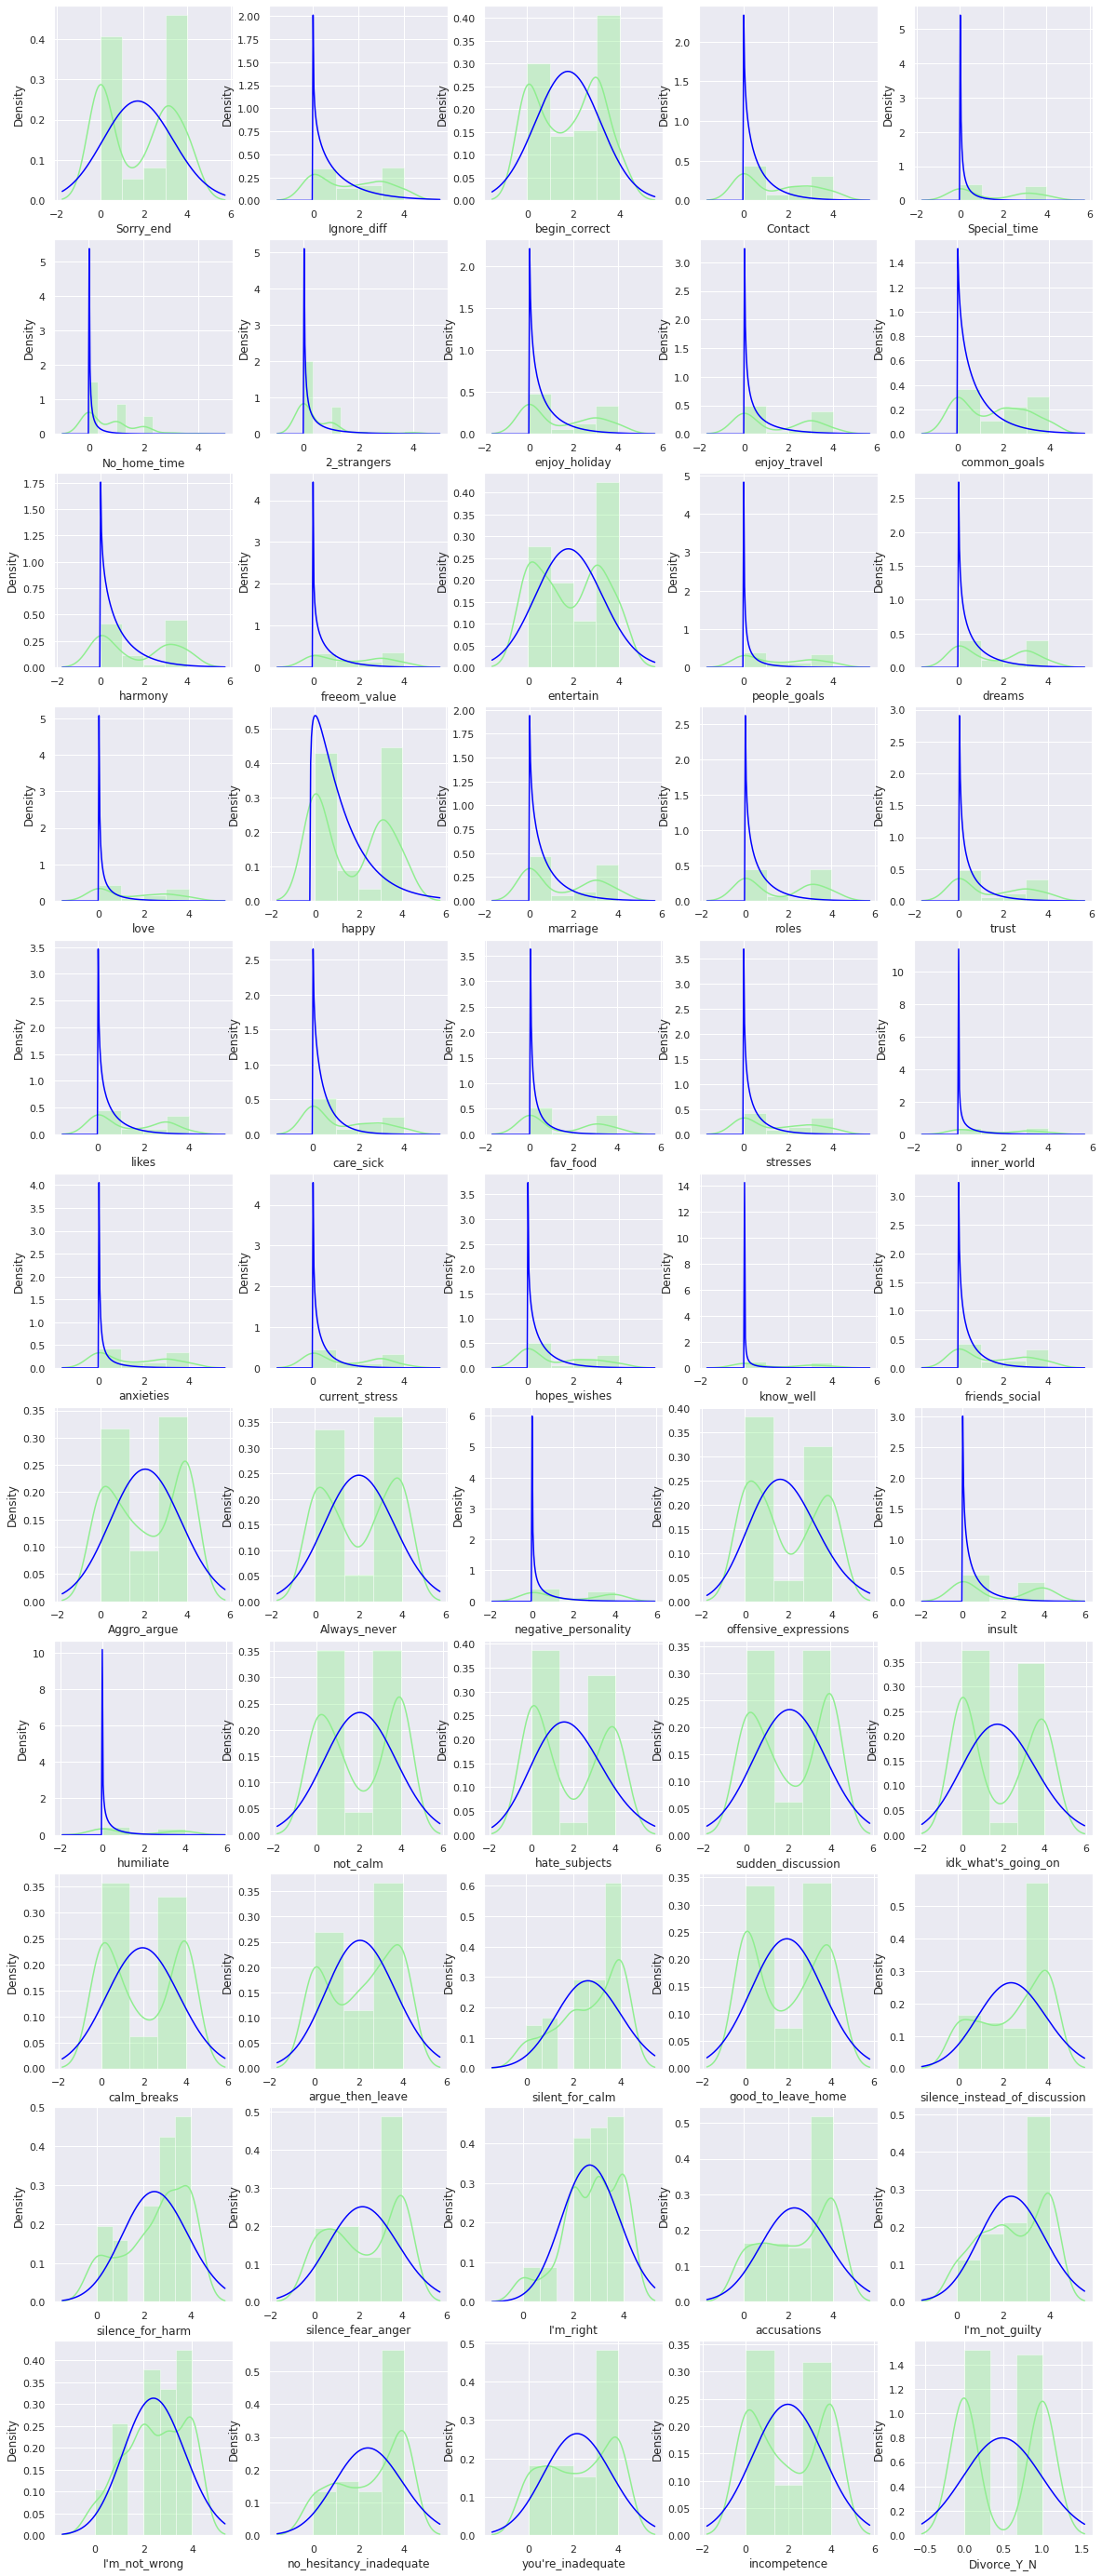

In [12]:
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(col_names, 1):
    plt.subplot(11,5,i)
    p=sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")

### Insights
- Some feaured are very highly skewd on one side; some are skewed iin both sides.

## 7.2 Co-Relation Analysis
## 7.2.1 Co-Relation Analysis of All features

### First 11 features

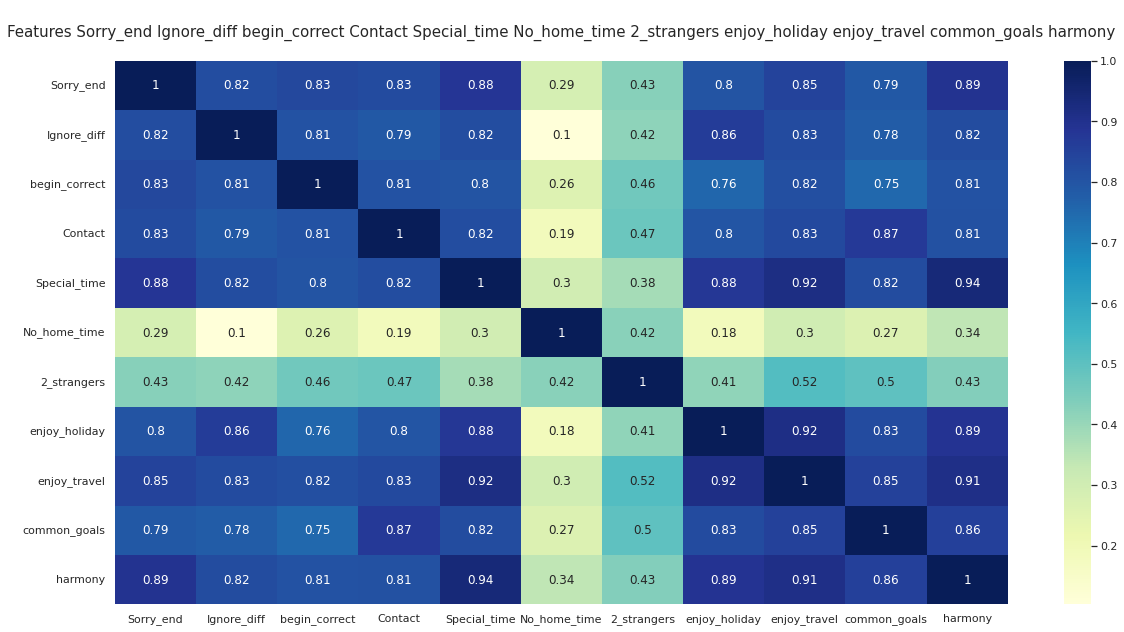

In [13]:
corr=df[col_names[:11]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[:11]])+"\n",fontsize=15);

### 2nd 11 features

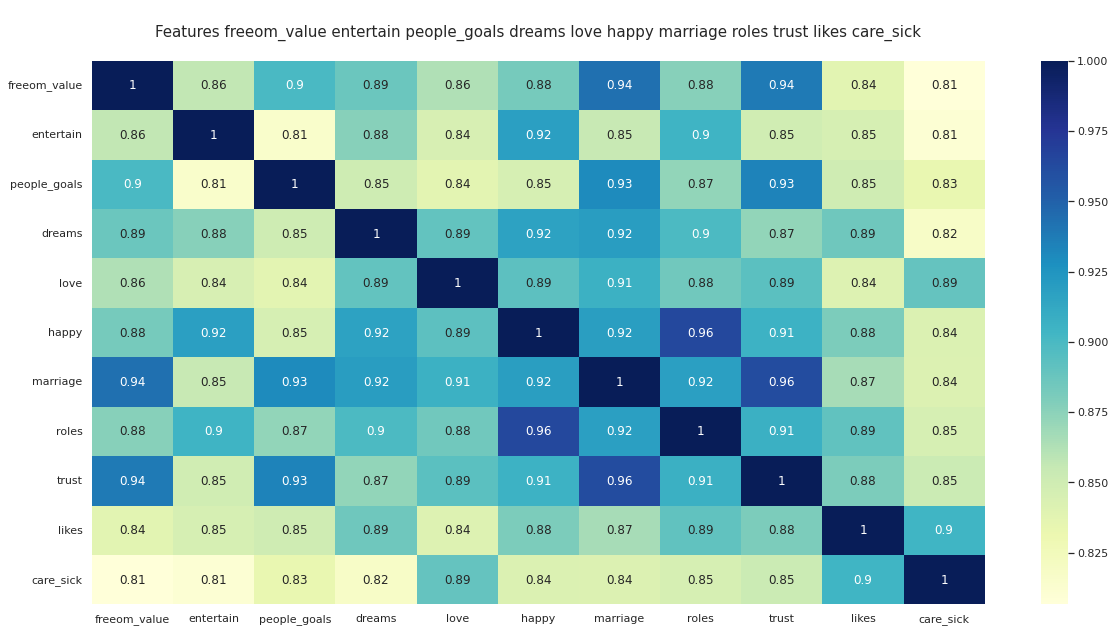

In [14]:
corr=df[col_names[11:22]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[11:22]])+"\n",fontsize=15);

### 3rd 11 features

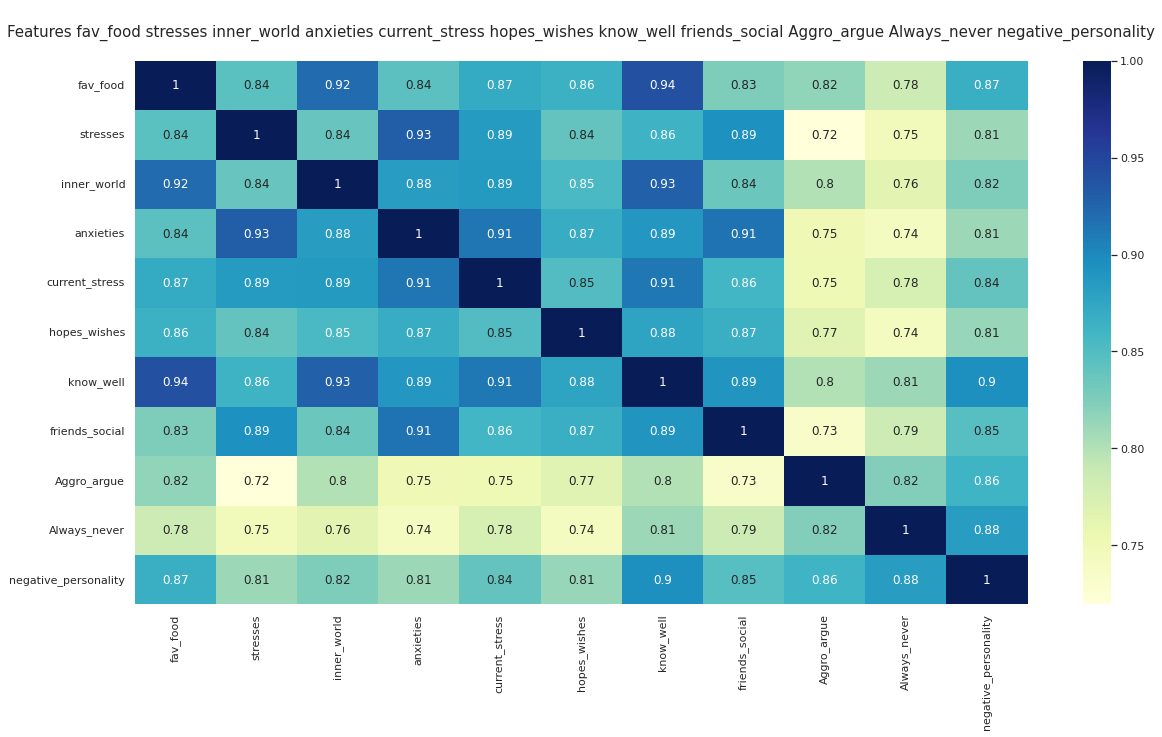

In [15]:
corr=df[col_names[22:33]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[22:33]])+"\n",fontsize=15);

### 4th 11 features

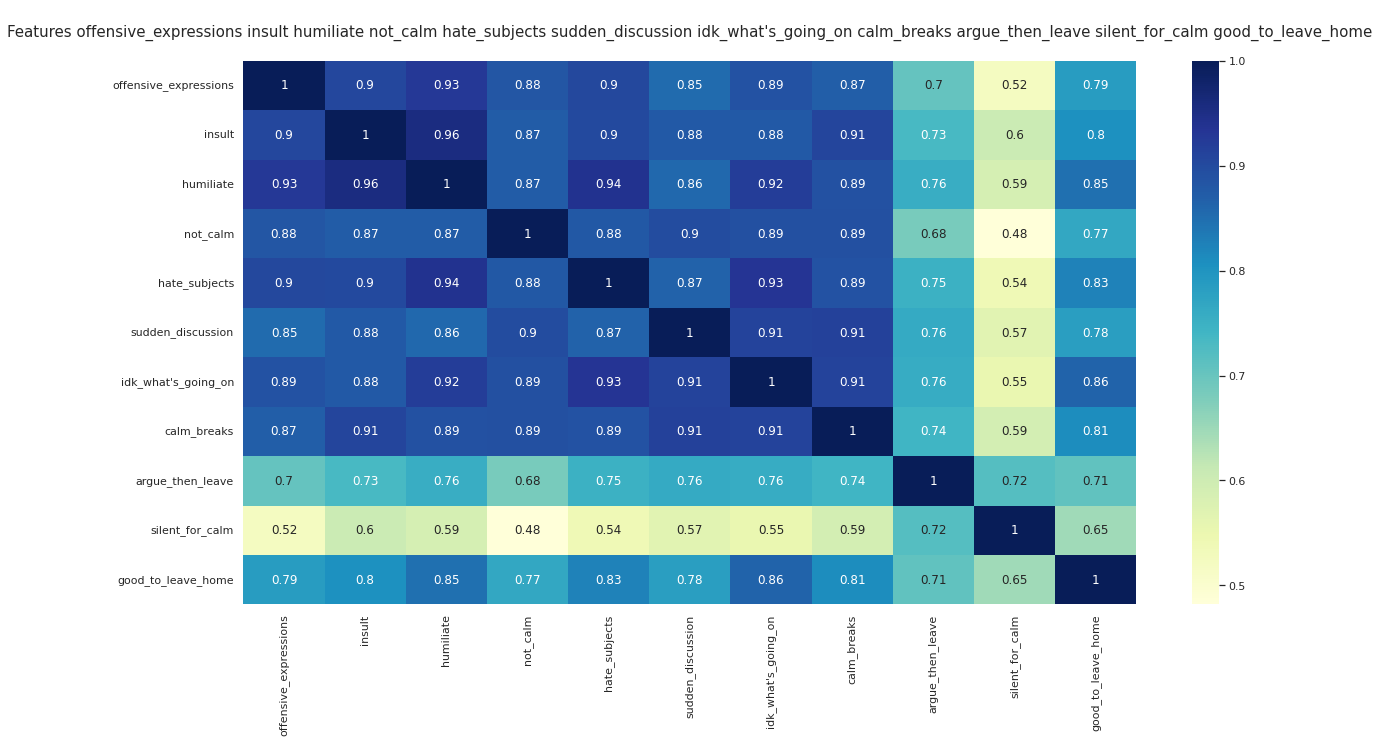

In [16]:
corr=df[col_names[33:44]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[33:44]])+"\n",fontsize=15);

### 5th 11 features

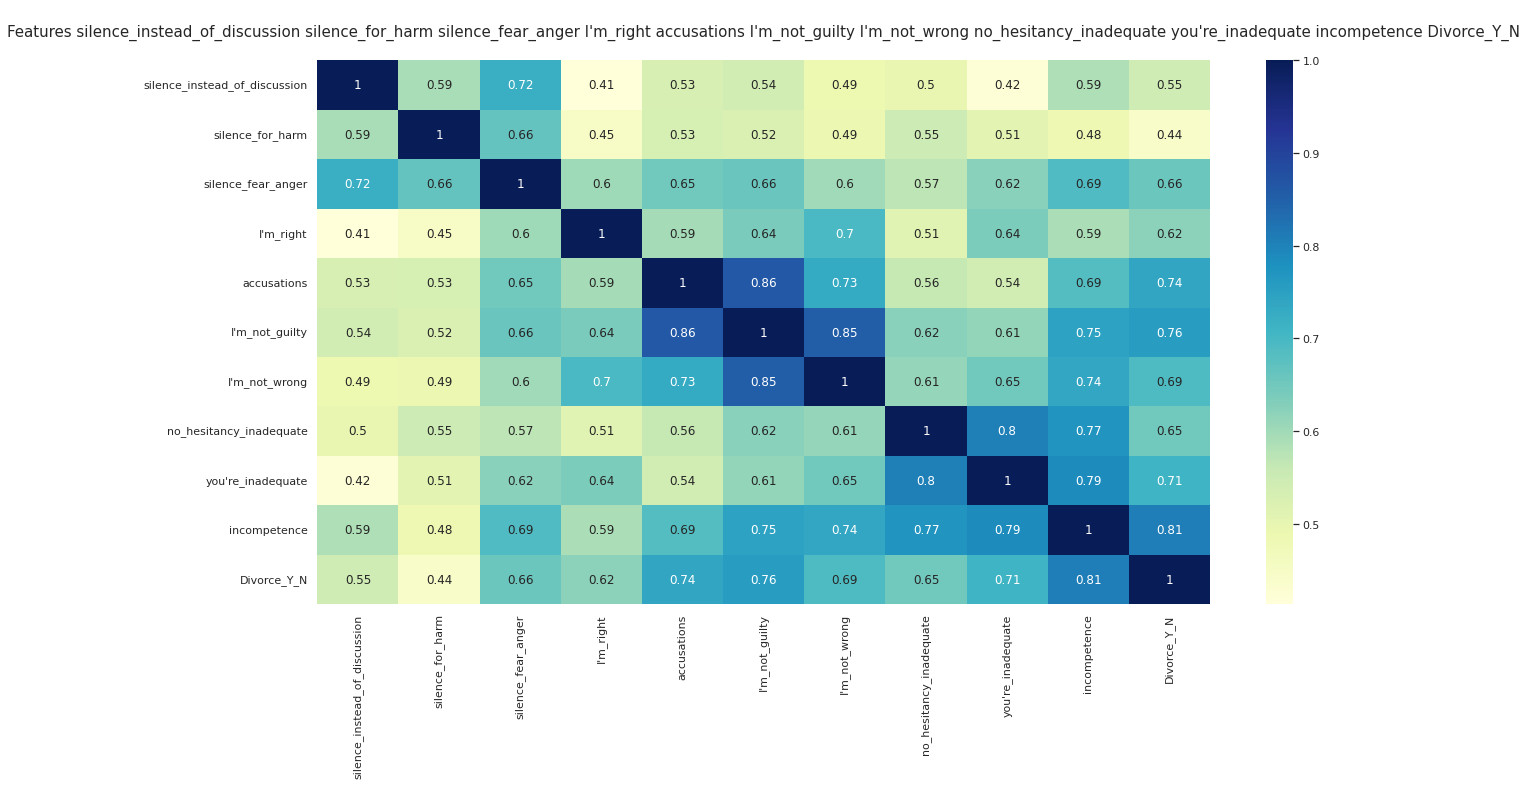

In [17]:
corr=df[col_names[44:55]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[44:55]])+"\n",fontsize=15);

### Insights
- some things are highly corelated, some are not.

## 7.2.1 Co-Relation Analysis of Target with features

In [18]:
col_names.remove('Divorce_Y_N')

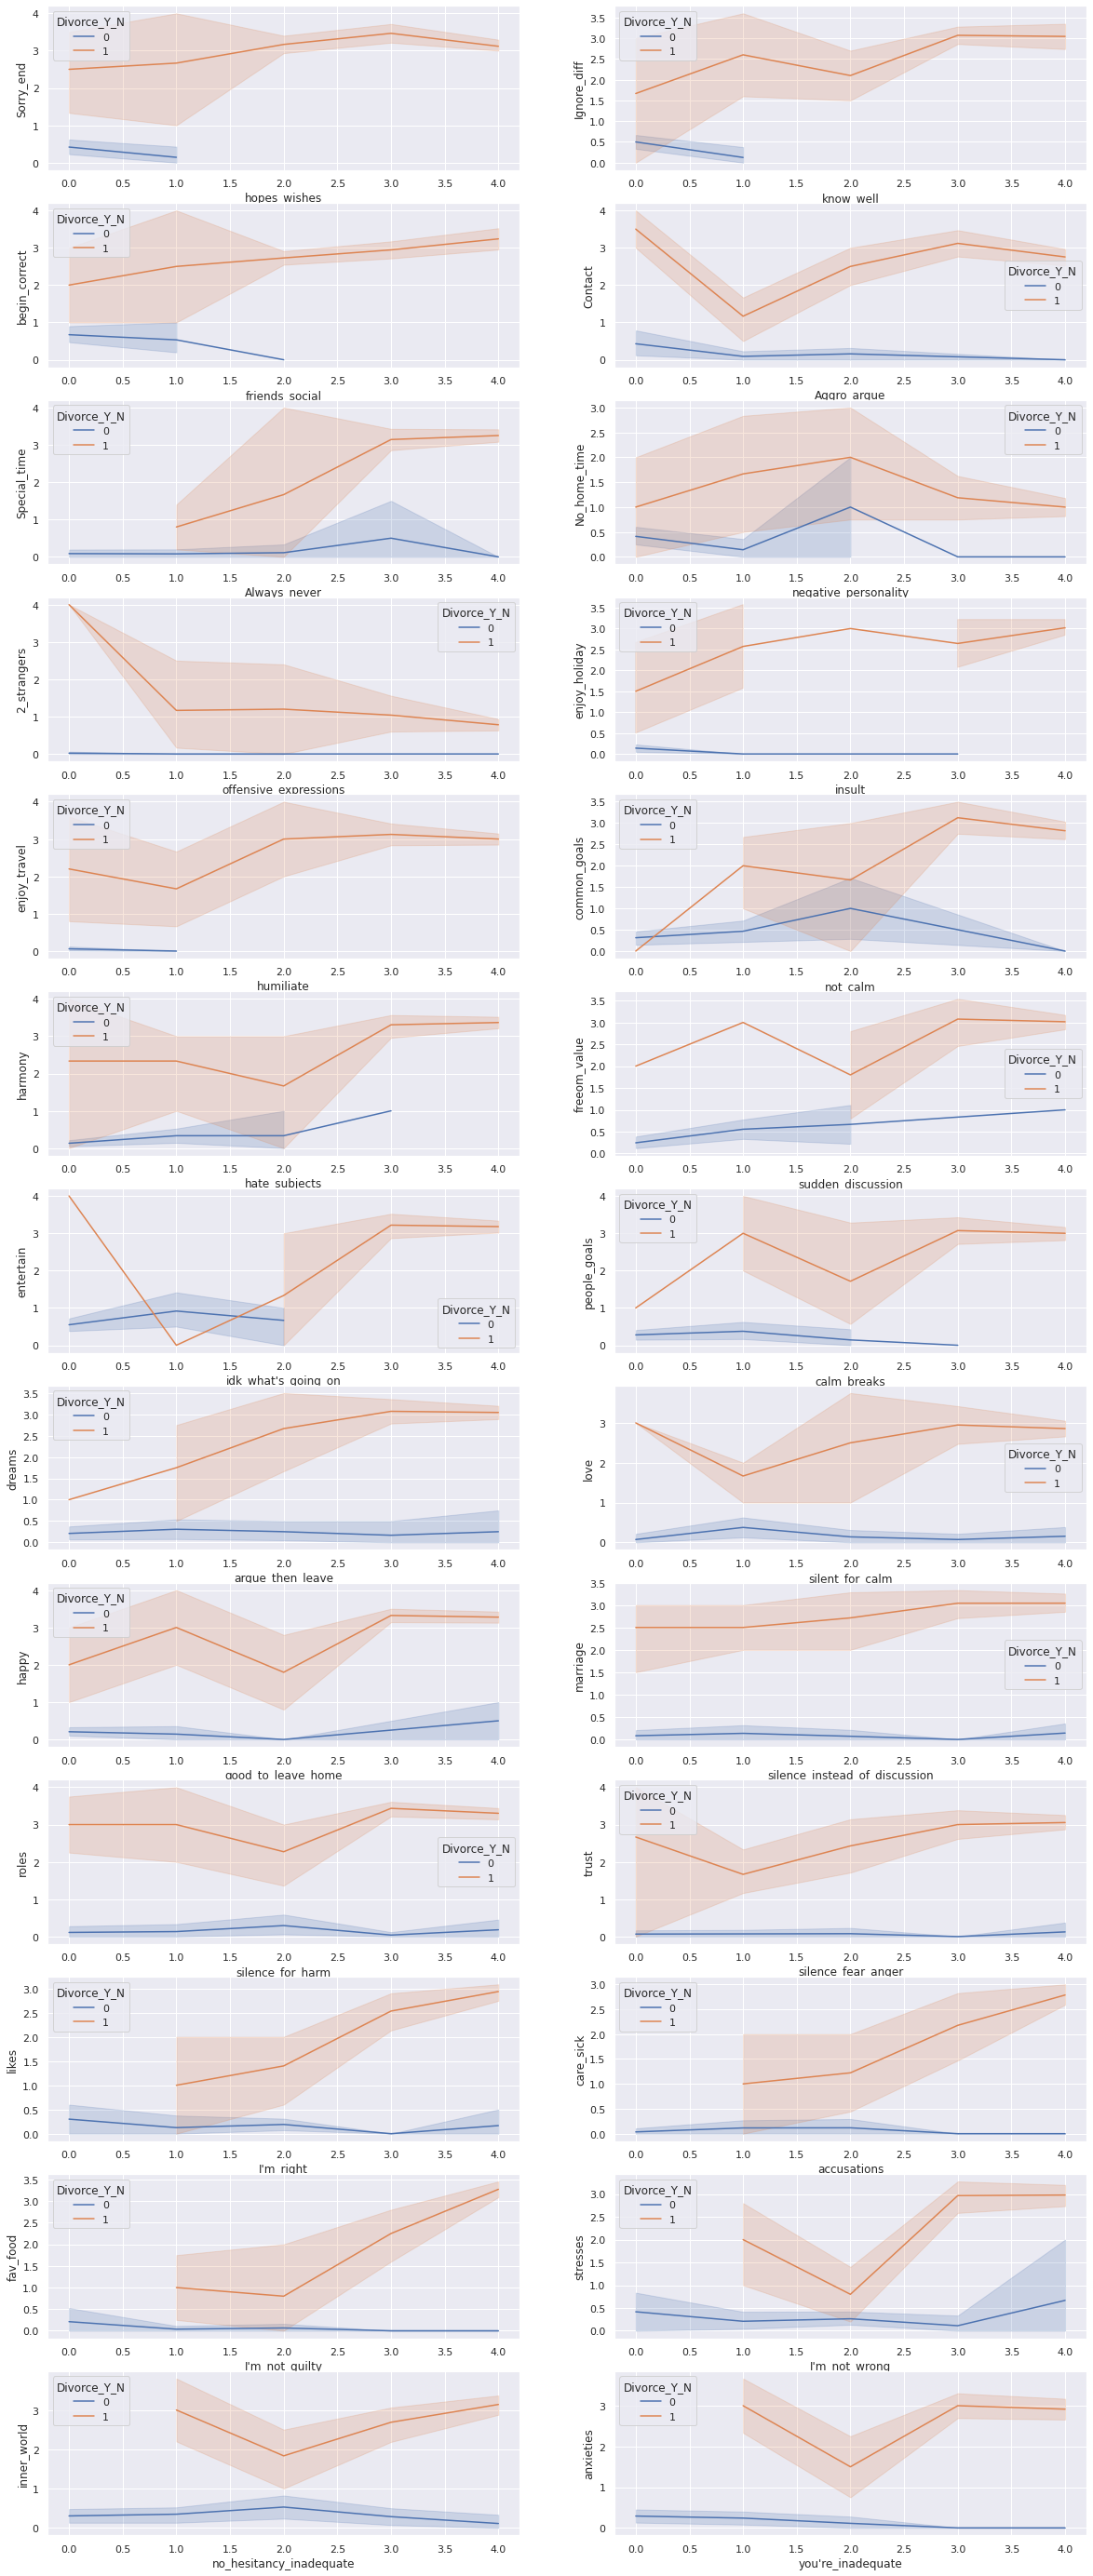

In [19]:
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(col_names[:26], 1):
    x=col_names[i+26]
    plt.subplot(13,2,i)
    p=sns.lineplot(hue='Divorce_Y_N',x=x,y=column,data=df,color='blue')

### Insights
- We can detect linearly seperable sections here.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Primary Modeling</div>

# 8. Primary Modeling

## 8.1. Train-test split

In [20]:
X=df[col_names]
Y=df['Divorce_Y_N']

## 8.2. Importing ML modules

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from xgboost import plot_tree
import xgboost as xgbcx

<div style="padding:20px;color:white;margin:0;font-size:150%;text-align:center;display:fill;border-radius:5px;background-color:#5d8dd9;overflow:hidden;font-weight:500">Grid Search with XGBoost</div>

## 8.3. Grid Search with XGBoost

### Grid searhced
Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=0.5,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

 Best normalized gini score for 3-fold search with 5 parameter combinations:
0.9907246376811596

 Best hyperparameters:
{'subsample': 0.8, 'min_child_weight': 0.5, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 0.8}

<div style="padding:20px;color:white;margin:0;font-size:150%;text-align:center;display:fill;border-radius:5px;background-color:#5d8dd9;overflow:hidden;font-weight:500">Modeling</div>

## 8.4. Modeling

In [22]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.15,random_state=3)
xgb = XGBClassifier(learning_rate=0.02,subsample=0.8,min_child_weight=0.5,max_depth=4,gamma=1,colsample_bytree=0.8, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1,random_state=3)
xgb.fit(train_X, train_Y)

[23:15:01] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=0.5,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=3, reg_alpha=0, ...)

In [23]:
scores = cross_val_score(xgb, train_X, train_Y, cv=5)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb, test_X, test_Y, cv=kfold )

[23:15:02] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:15:03] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:15:04] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

In [24]:
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean());

Mean cross-validation score: 0.97
K-fold CV average score: 0.95


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">RFE - Feature Selection and Better Modeling</div>

# 8.X RFE - Feature Selection and Better Modeling

***RFE - recursive feature elimination***

*Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.*

<div style="padding:20px;color:white;margin:0;font-size:150%;text-align:center;display:fill;border-radius:5px;background-color:#5d8dd9;overflow:hidden;font-weight:500">RFE (Logistic Regression) with Top 6 columns</div>

## 8.X.1. RFE with Top 6 columns

In [25]:
from sklearn.linear_model import LogisticRegression
#importing RFE
from sklearn.feature_selection import RFE

# Create the RFE with a LogisticRegression estimator and 6 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

# Fits the eliminator to the data
rfe.fit(train_X, train_Y)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 fe

RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

In [26]:
# Calculates the test set accuracy
acc = roc_auc_score(test_Y, rfe.predict(test_X))
print(f"{acc:.1%} roc_auc_score on test set.") 

# Calculates the train set accuracy
acc = roc_auc_score(train_Y, rfe.predict(train_X))
print(f"{acc:.1%} roc_auc_score on train set.") 

# Calculates the overall set accuracy
acc = roc_auc_score(Y, rfe.predict(X))
print(f"{acc:.1%} roc_auc_score on whole set.") 

100.0% roc_auc_score on test set.
100.0% roc_auc_score on train set.
100.0% roc_auc_score on whole set.


<div style="padding:20px;color:white;margin:0;font-size:140%;text-align:left;display:fill;border-radius:5px;background-color:#387c44;overflow:hidden;font-weight:500">Question to Viewers : Does RFE (Recursive Feature Elimination) - Logistic Regression Combo overperforms XGBoost?</div>

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Feature Importance with RFE</div>

# 9. Feature Importance with RFE

## 9.1. RFE Top features

In [27]:
# Print the features and their ranking (high = dropped early on)
data=dict(zip(df.columns, rfe.ranking_))
rfe_data= {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

n=1
for key, value in rfe_data.items():
    print(key, ' : ', value)
    if n==15:
        break
    n=n+1

happy  :  1
marriage  :  1
anxieties  :  1
hopes_wishes  :  1
idk_what's_going_on  :  1
accusations  :  1
begin_correct  :  2
dreams  :  3
no_hesitancy_inadequate  :  4
Aggro_argue  :  5
sudden_discussion  :  6
roles  :  7
good_to_leave_home  :  8
No_home_time  :  9
Sorry_end  :  10


## 9.2. Confusion Matrix

<AxesSubplot:>

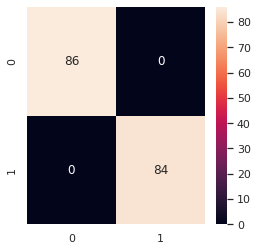

In [28]:
ypred = rfe.predict(X)
cm = confusion_matrix(Y,ypred) 
sns.set(rc={'figure.figsize':(4,4)})
sns.heatmap(cm, annot=True)

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Feature Importance by XGBoost Only</div>

# 10. Feature Importance by XGBoost Only

<AxesSubplot:>

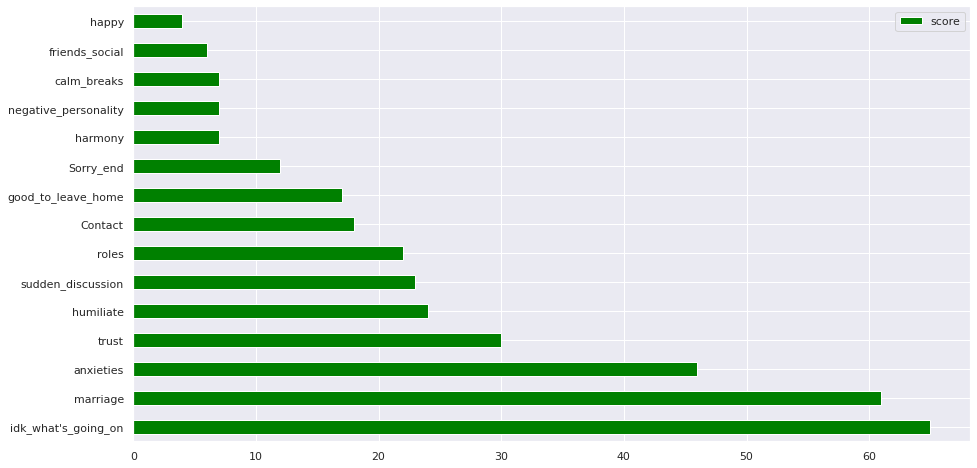

In [29]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(15, columns="score").plot(kind='barh', figsize = (15,8),color="green") 

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Feature Importance by XGBoost with SHAP</div>

# 11. Feature Importance by XGBoost with SHAP

In [30]:
import shap
explainer   = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(xgbcx.DMatrix(df[col_names]))

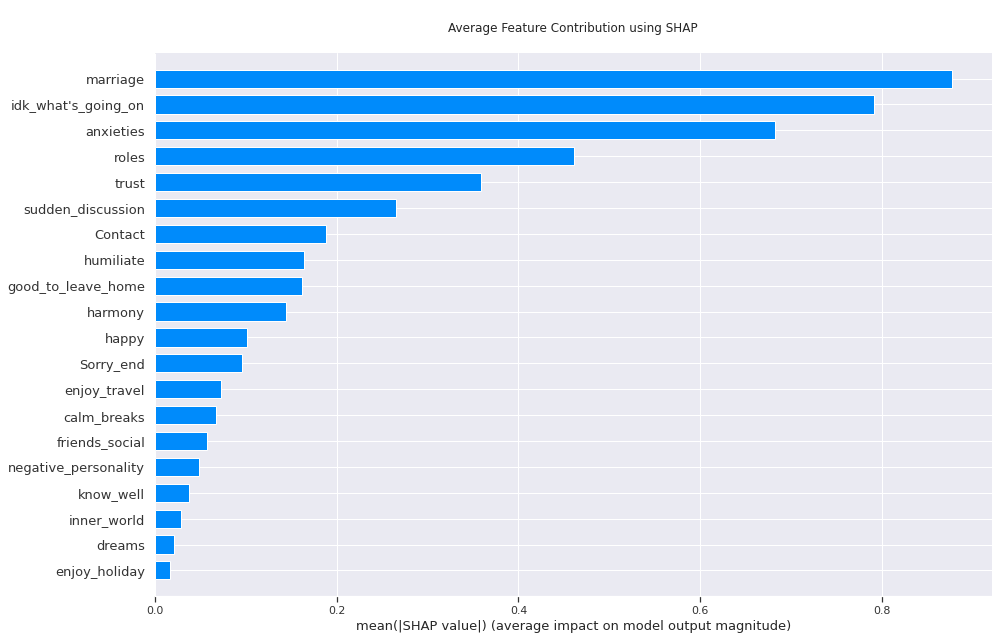

In [31]:
plt.title('\nAverage Feature Contribution using SHAP\n')
shap.summary_plot(shap_values, df[col_names], plot_type="bar", plot_size = (15,10))

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Listing Top Features</div>

# 12. Listing Top Features

## 12.1. Listing Top Features by XGB Only

In [32]:
data['col_name']=data.index
tXGB=list(data['col_name'][:5])
print("Top features using XGBoost only :",", ".join(tXGB))

Top features using XGBoost only : idk_what's_going_on, marriage, anxieties, trust, humiliate


## 12.2. Listing Top Features using SHAP

In [33]:
rf_resultX = pd.DataFrame(shap_values, columns = col_names)
vals = np.abs(rf_resultX.values).mean(0)
shap_importance = pd.DataFrame(list(zip(col_names, vals)),columns=['col_name','score'])
shap_importance.sort_values(by=['score'],ascending=False, inplace=True)
tSHAP=list(shap_importance['col_name'][:5])
print("Top features using SHAP :",", ".join(tSHAP))

Top features using SHAP : marriage, idk_what's_going_on, anxieties, roles, trust


## 12.3. Listing Top Features using RFE

In [34]:
tRFE= list(rfe_data.keys())[:6]
print("Top features using RFE :",", ".join(tRFE))

Top features using RFE : happy, marriage, anxieties, hopes_wishes, idk_what's_going_on, accusations


## 12.4. Combining common features of SHAP and XGB

In [35]:
common=list(set(tSHAP).intersection(set(tXGB)))
common=list(set(common).intersection(set(tRFE)))
print("Top common features using XGBoost and SHAP :",", ".join(common))

Top common features using XGBoost and SHAP : idk_what's_going_on, marriage, anxieties


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Analyzing Top Features with Discussions</div>

# 13. Analyzing Top Features with Discussions

## 13.1. Analyzing Top features with Insights

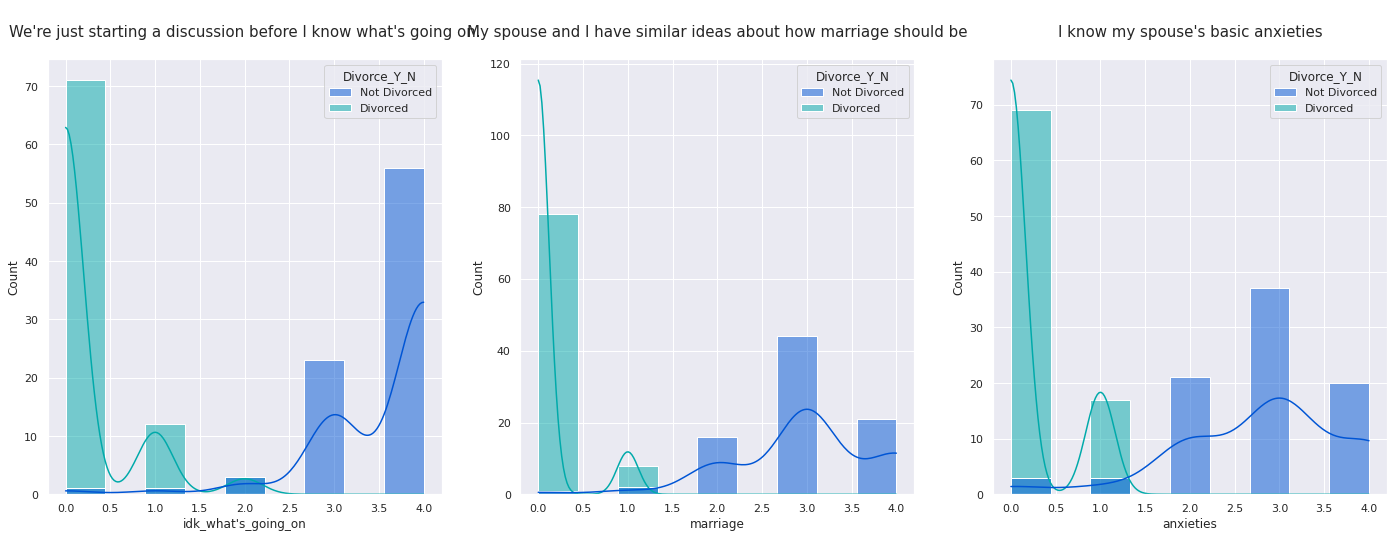

In [36]:
features_full={"marriage": "My spouse and I have similar ideas about how marriage should be", "idk_what's_going_on" : "We're just starting a discussion before I know what's going on.","trust" : "My spouse and I have similar values in trust.","anxieties" : "I know my spouse's basic anxieties"}
dfx=df.copy()
dfx["Divorce_Y_N"].replace({0: "Divorced", 1: "Not Divorced"}, inplace=True)
sns.set(rc={'figure.figsize':(24,8)})
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(common, 1):
    plt.subplot(1,3,i)
    p=sns.histplot(x=column,data=dfx,hue="Divorce_Y_N",stat='count',kde=True,palette='winter')
    p.axes.set_title("\n"+str(features_full[column])+"\n",fontsize=15);

- score 0 means I completely disagree withh the statement.
- score 4 means I completely disagree withh the statement.

### Top features
- **marriage** - My spouse and I have similar ideas about how marriage should be
- **idk_what's_going_on** - We're just starting a discussion before I know what's going on.
- **anxieties** - I know my spouse's basic anxieties

### **idk_what's_going_on** - We're just starting a discussion before I know what's going on.
#### Insights:
- Let each others know what's going onn, then start fighting.

### **marriage** - My spouse and I have similar ideas about how marriage should be.
#### Insights:
- Discuss about marriage before marriage!

### **anxieties** - I know my spouse's basic anxieties.
#### Insights:
- Knowing basic anxieties reduces divorce chances.
- Even simple disturbance can cause divorce here.

## 13.2. Top 6 Features Corelation Analysis

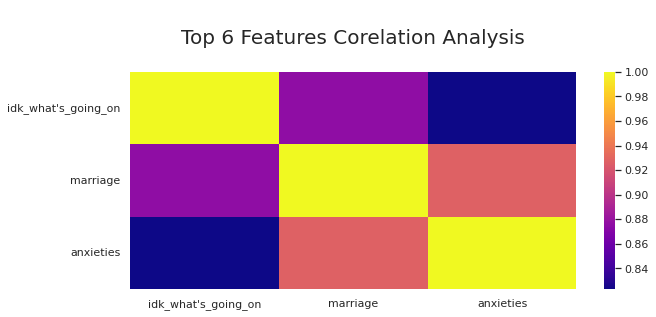

In [37]:
corr=df[common].corr()
sns.set(rc={'figure.figsize':(10,4)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="plasma")
p.axes.set_title("\nTop 6 Features Corelation Analysis\n",fontsize=20);

## Insights:
- Very very high co-relation

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Feature reduction with TSNE Clustering</div>

# 14. Feature reduction with TSNE Clustering

# 14.1. Feature reduction with TSNE Clustering - All Features

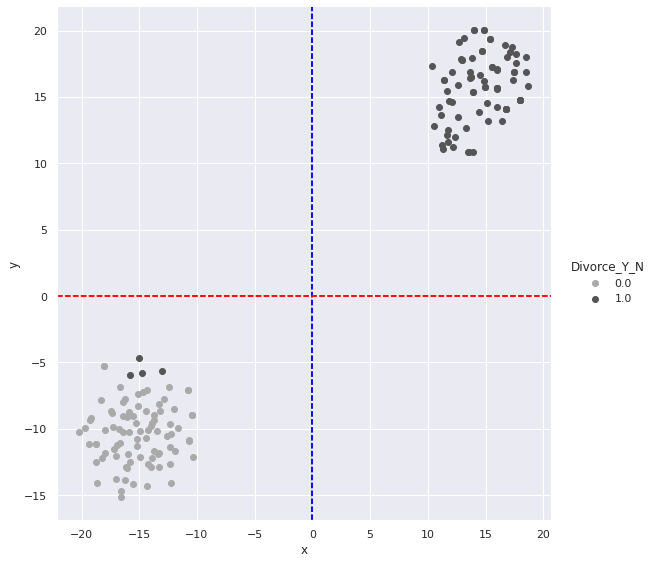

In [38]:
cols=list(df.columns)
cols.remove("Divorce_Y_N")

#TSNE class, 2 coomppotents for easy visualization
tsne = manifold.TSNE(n_components=2, random_state=42)

#transforming data
transformed_data = tsne.fit_transform(df[cols])
tsne_df = pd.DataFrame(np.column_stack((transformed_data, df["Divorce_Y_N"])),columns=["x",'y',"Divorce_Y_N"])

#plotting TSNE transformed data
sns.set(rc={'figure.figsize':(15,10)})
grid = sns.FacetGrid(tsne_df, hue="Divorce_Y_N", size=8,palette='binary')
grid.map(plt.scatter, "x", "y").add_legend()
grid.refline(x=tsne_df["Divorce_Y_N"].quantile(0.5), color='blue')
grid.refline(y=tsne_df["Divorce_Y_N"].quantile(0.5), color='red');

### Insights:
- Lineraly seperable into two groups, with 4 outliers.
- Logistic Regression - RFE combo - caught them too!

# 14.2. Feature reduction with TSNE Clustering - Top Features from all.

Features used : roles, accusations, hopes_wishes, happy, idk_what's_going_on, humiliate, trust, marriage, anxieties


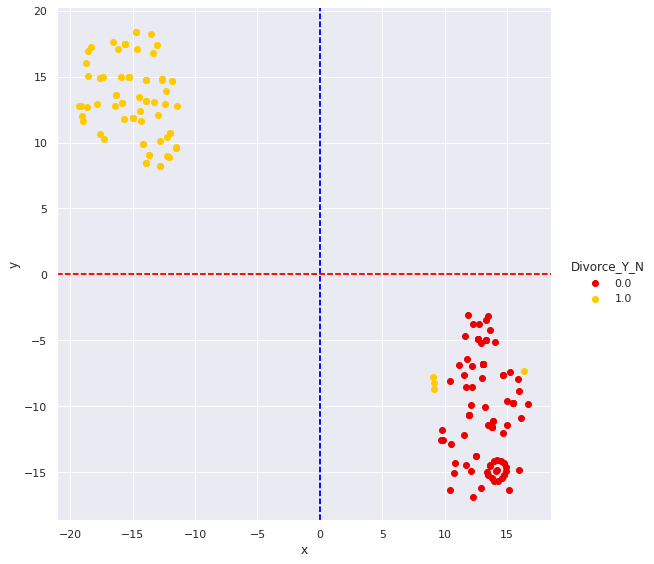

In [39]:
all_imp_f=list(set(tSHAP).union(set(tXGB)))
all_imp_f=list(set(all_imp_f).union(set(tRFE)))

print("Features used :",", ".join(all_imp_f))

#TSNE class, 2 coomppotents for easy visualization
tsne = manifold.TSNE(n_components=2, random_state=42)

#transforming data
transformed_data = tsne.fit_transform(df[all_imp_f])
tsne_df = pd.DataFrame(np.column_stack((transformed_data, df["Divorce_Y_N"])),columns=["x",'y',"Divorce_Y_N"])

#plotting TSNE transformed data
sns.set(rc={'figure.figsize':(15,10)})
grid = sns.FacetGrid(tsne_df, hue="Divorce_Y_N", size=8,palette='hot')
grid.map(plt.scatter, "x", "y").add_legend()
grid.refline(x=tsne_df["Divorce_Y_N"].quantile(0.5), color='blue')
grid.refline(y=tsne_df["Divorce_Y_N"].quantile(0.5), color='red');

# 14.3. Feature reduction with TSNE Clustering - Top **Common** Features from all.

Features used : idk_what's_going_on, marriage, anxieties


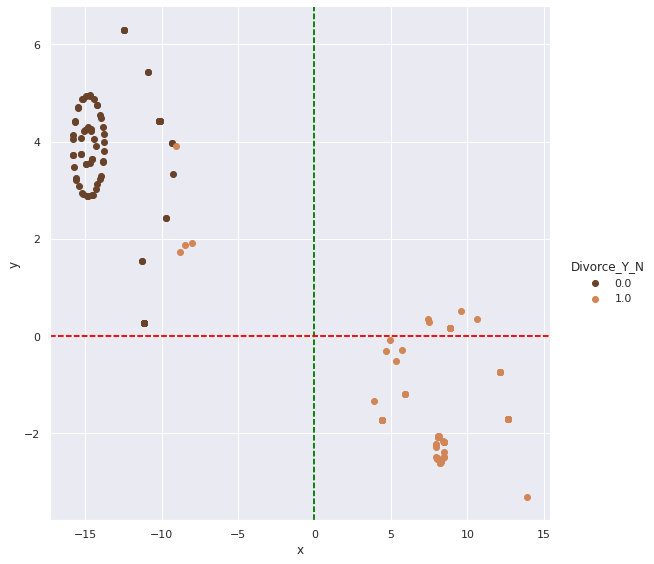

In [40]:
#TSNE class, 2 coomppotents for easy visualization
tsne = manifold.TSNE(n_components=2, random_state=42)

print("Features used :",", ".join(common))

#transforming data
transformed_data = tsne.fit_transform(df[common])
tsne_df = pd.DataFrame(np.column_stack((transformed_data, df["Divorce_Y_N"])),columns=["x",'y',"Divorce_Y_N"])

#plotting TSNE transformed data
sns.set(rc={'figure.figsize':(15,10)})
grid = sns.FacetGrid(tsne_df, hue="Divorce_Y_N", size=8,palette='copper')
grid.map(plt.scatter, "x", "y").add_legend()
grid.refline(x=tsne_df["Divorce_Y_N"].quantile(0.1), color='green')
grid.refline(y=tsne_df["Divorce_Y_N"].quantile(0.1), color='red');

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Other features </div>

# 15. Other features 

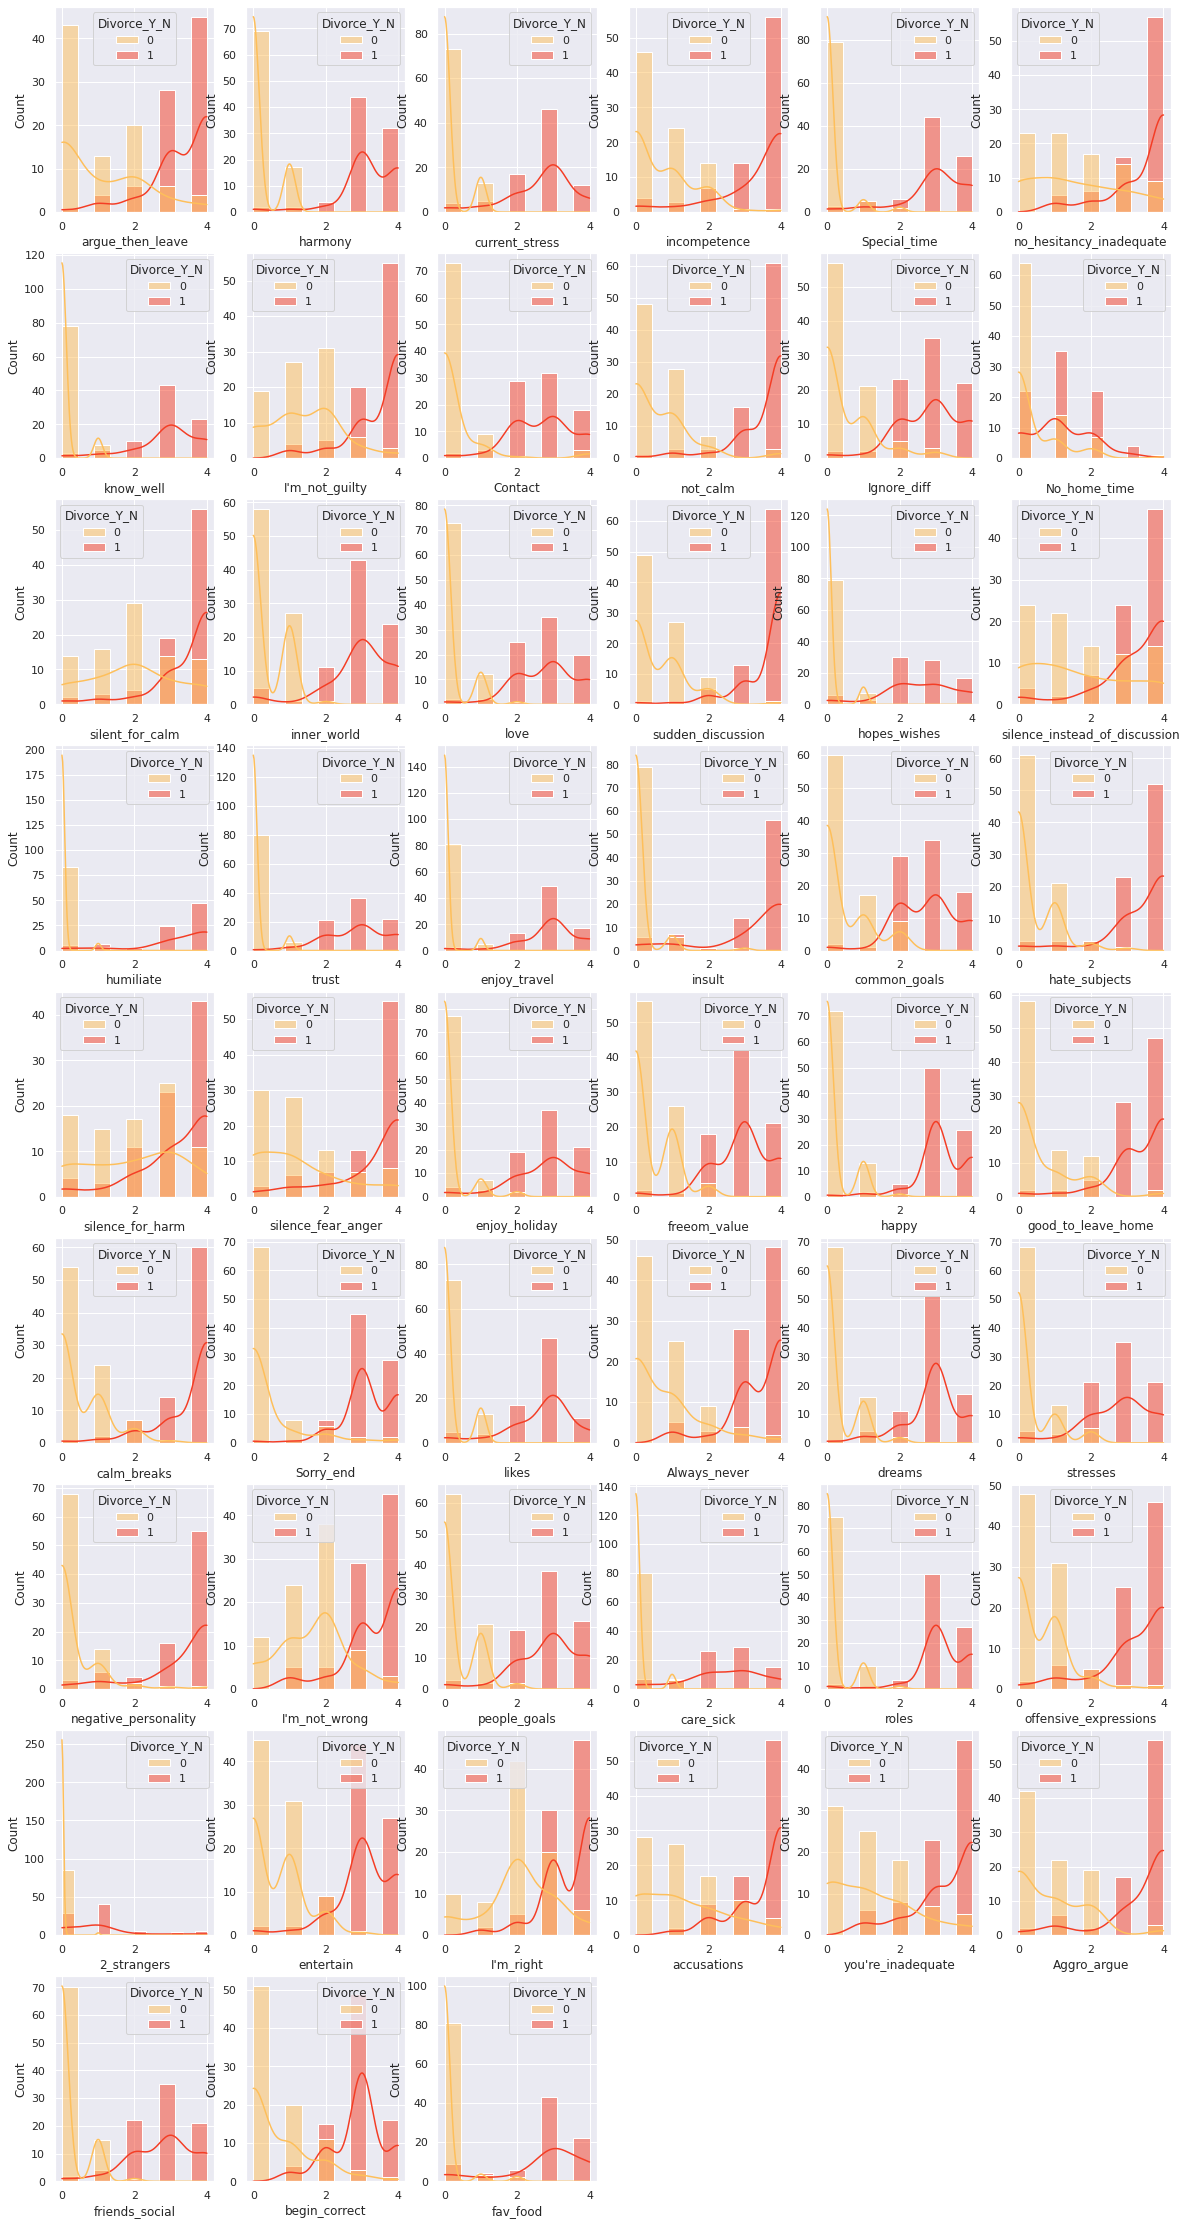

In [41]:
sns.set(rc={'figure.figsize':(20,40)})
for i, column in enumerate(list(set(col_names).difference(set(common))), 1):
    plt.subplot(9,6,i)
    p=sns.histplot(x=column,data=df,hue="Divorce_Y_N",stat='count',kde=True,palette='YlOrRd')

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Conclusion</div>

#  16. Conclusion
- Mutual communication and beliefs are they key of successful marriage. Otherwise, its divorce.

# Support, Upvote, Fork, Share, Comment